# Fuga de Clientes

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

## Inicialización

In [1]:
# Importar librerías
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)

## Carga de datos

In [3]:
# Importar datastes
contracts = pd.read_csv("./files/datasets/input/contract.csv")
internet = pd.read_csv("./files/datasets/input/internet.csv")
personal = pd.read_csv("./files/datasets/input/personal.csv")
phone = pd.read_csv("./files/datasets/input/phone.csv")

## Análisis exploratorio

### contract

In [4]:
# Imprimir datos
contracts

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [5]:
# Ver información del dataset
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
# Verificar número de cliente únicos
contracts['customerID'].nunique()

7043

In [7]:
# Verificar contenido en 'TotalCharges'
contracts['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
# Ver casos con valores nulos
contracts.query("TotalCharges==' '")

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [9]:
# Filtrar contratos sin cobos totales
contract_with_charges = contracts.query("TotalCharges not in' '")
contract_with_charges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   object 
dtypes: float64(1), object(7)
memory usage: 494.4+ KB


In [10]:
# Ver información estadísica de varaible numéricas
contract_with_charges['TotalCharges'] = contract_with_charges['TotalCharges'].astype(float)
contract_with_charges.describe()

C:\Users\rfajardo\AppData\Local\Temp\ipykernel_44428\1058132662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_with_charges['TotalCharges'] = contract_with_charges['TotalCharges'].astype(float)


,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


### internet

In [11]:
# Ver sample de data
internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4016,1078-TDCRN,DSL,No,Yes,No,No,No,No
4527,1169-WCVAK,Fiber optic,Yes,Yes,No,Yes,No,No
4745,8364-TRMMK,DSL,No,No,No,No,No,No
4469,8903-XEBGX,DSL,No,No,No,No,No,Yes
1989,4277-PVRAN,Fiber optic,No,No,No,No,Yes,No
4929,7493-TPUWZ,Fiber optic,No,Yes,No,No,No,No
1393,3902-MIVLE,DSL,Yes,No,Yes,Yes,No,Yes
2249,7508-MYBOG,Fiber optic,No,No,No,No,Yes,No
491,8672-OAUPW,DSL,No,No,No,Yes,No,No
2183,4760-THGOT,Fiber optic,Yes,Yes,No,No,No,Yes


In [12]:
# Ver clientes únicos
internet['customerID'].nunique()

5517

In [13]:
# Ver info de data
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


### personal

In [14]:
# Ver sample de data
personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
1730,3877-JRJIP,Male,0,No,No
6764,7660-HDPJV,Female,0,No,No
3562,1624-NALOJ,Male,1,No,No
4018,2969-WGHQO,Female,0,Yes,Yes
4010,3727-JEZTU,Female,0,No,No
6234,5995-LFTLE,Male,0,No,No
983,8603-IJWDN,Male,0,No,No
3941,4797-MIWUM,Male,0,Yes,Yes
6471,0859-YGKFW,Male,0,Yes,Yes
2791,1023-BQXZE,Male,0,No,No


In [15]:
# Ver info de data
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### phone

In [16]:
# Ver sample de data
phone.sample(10)

,customerID,MultipleLines
3002,9643-AVVWI,No
2744,2065-MMKGR,Yes
583,1626-ERCMM,Yes
2306,0784-ZQJZX,No
439,0388-EOPEX,No
4537,1699-TLDLZ,No
3553,2773-OVBPK,Yes
4365,4182-BGSIQ,No
1979,2931-VUVJN,Yes
5081,2344-JMOGN,No


In [17]:
# Ver info de data
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [18]:
# Verificar si hay clinetes con ambos servicios
phone.merge(internet, how='left')

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
1,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
2,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
3,9305-CDSKC,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
4,1452-KIOVK,Yes,Fiber optic,No,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...
6356,2569-WGERO,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6357,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
6358,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
6359,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


### Pre-preparación de datos

In [19]:
# Unir data frames
df = contracts.merge(phone, how='left')
df = df.merge(internet, how='left')
df = df.merge(personal, how='left')
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


In [20]:
# Verificar información del dataframe final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     6361 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


Al unir los datasets, las columnas respectivas a los ervicios (phone y internet), contienen valores nulos debido a que hay clientes que sol tiene uno de estos servicios. Reemplazaremos estos valores nulo con la palabra "non-contracted" para identificar estos casos.

In [21]:
# Reemplazar valores nulos
df.fillna("non-contracted", inplace=True)
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,non-contracted,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


Ahora cambiaremos los nombres de la columnas usando un función que aplica el método "snake"

In [22]:
# Crear función para cambiar nombres de columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Renombrar columnas usando la función to_snake_case
df.columns = [to_snake_case(col) for col in df.columns]

In [23]:
# Verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  gender             7043 

También cambiaremos la columna 'begin_date' a tipo datetime.

In [24]:
# Convertir 'begin_date' a datetime
df['begin_date'] = pd.to_datetime(df['begin_date'])

Ahora en el acaso de la columna "total_charges", el cual contiene registros sin valores numéricos (" "), serán filtrados debido a que forman menos del 1% del dataset. Estos casos se deben a que todabía no se ha cumplido el periodo del contrato de paga.

In [25]:
# Filtrar los registros donde la columna 'B' contiene un espacio en blanco
df = df[df['total_charges'] != ' ']
df['total_charges'] = df['total_charges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   begin_date         7032 non-null   datetime64[ns]
 2   end_date           7032 non-null   object        
 3   type               7032 non-null   object        
 4   paperless_billing  7032 non-null   object        
 5   payment_method     7032 non-null   object        
 6   monthly_charges    7032 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   multiple_lines     7032 non-null   object        
 9   internet_service   7032 non-null   object        
 10  online_security    7032 non-null   object        
 11  online_backup      7032 non-null   object        
 12  device_protection  7032 non-null   object        
 13  tech_support       7032 non-null   object        
 14  streaming_tv 

C:\Users\rfajardo\AppData\Local\Temp\ipykernel_44428\2532980684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df['total_charges'].astype(float)


In [26]:
# Agregar columna churn
df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)

C:\Users\rfajardo\AppData\Local\Temp\ipykernel_44428\1324548742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)


In [27]:
# Verificar df
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,...,No,Yes,No,No,No,Male,0,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,Yes,No,No,No,No,Male,0,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,...,No,No,No,No,No,Female,0,No,No,1


## Análisis de datos

Ahora que tenemos nuestro dataset pre-procesado, comenzaremos a analizar las variables a través de gráficos de histogramas y boxplots, separaremos nuestro análisis en varaibles numéricas y categóricas. También veremos la evolución de los contratos de los servicios.

In [28]:
# Estableceer columna numéricas y categóricas
numeric_columns = ['monthly_charges' ,'total_charges']
categorical_columns = list(set(df.columns) - set(numeric_columns) - set(['customer_id', 'begin_date', 'end_date']))

In [29]:
categorical_columns

['senior_citizen',
 'paperless_billing',
 'dependents',
 'partner',
 'type',
 'payment_method',
 'internet_service',
 'online_backup',
 'device_protection',
 'online_security',
 'tech_support',
 'multiple_lines',
 'streaming_movies',
 'churn',
 'gender',
 'streaming_tv']

### Análisis variables numéricas

monthly_charges:
Median: 70.35
Mean: 70.35

total_charges:
Median: 1397.475
Mean: 1397.475



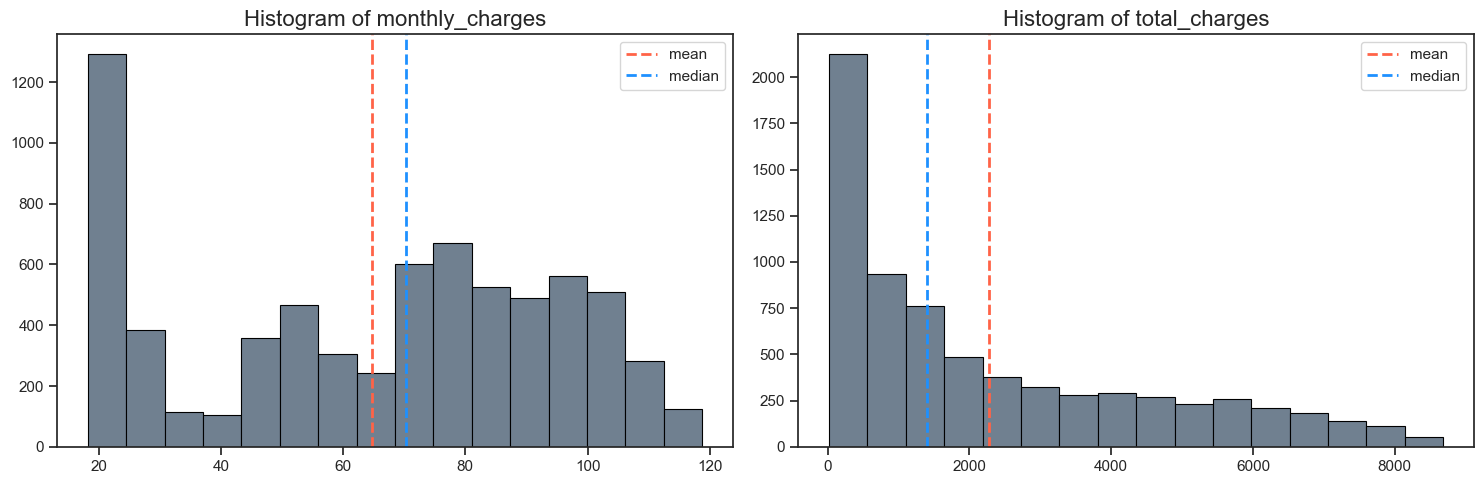

In [30]:
# Graficar histogramas por columna
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2 

# Crear sub gráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5)) 

# Aplanar el arreglo de ejes para que podamos iterar sobre él fácilmente
axes = axes.flatten()

# Iterar por cada columna numérica y crear histograma
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=16, color='slategray', edgecolor="black", linewidth=0.8)
    
    # Dibujar líneas para media y mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)

    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {median_val}')
    print()
    
    # Anadir leyenda
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    axes[i].set_title(f'Histogram of {col}', fontsize=16)
    
# Remover sub gráficos no usados
if len(numeric_columns) % 2:
    for j in range(i+1, num_rows*2):
        fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

monthly_charges:
Median: 70.35
Mean: 64.79820819112628

total_charges:
Median: 1397.475
Mean: 2283.300440841866



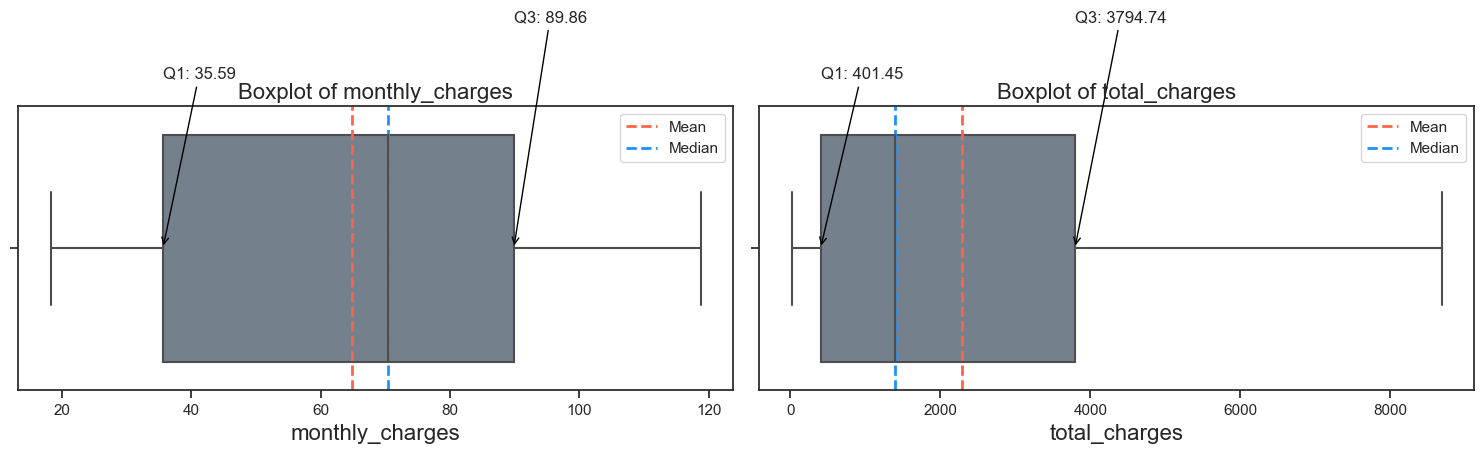

In [31]:
# Graficar boxplots por columna
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], color='slategray', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=20, weight='bold')
    axes[i].set_xlabel(col, fontsize=16)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    q1_val = df[col].quantile(0.25)
    q3_val = df[col].quantile(0.75)
    
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    # Annotate the lines
    axes[i].annotate(f'Q1: {q1_val:.2f}', xy=(q1_val, 0), xytext=(q1_val, -0.6),
                     textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=12)
    axes[i].annotate(f'Q3: {q3_val:.2f}', xy=(q3_val, 0), xytext=(q3_val, -0.8),
                     textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=12)
    
    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {mean_val}')
    print()
    
    axes[i].legend([mean_line, median_line], ['Mean', 'Median'])
    axes[i].set_title(f'Boxplot of {col}', fontsize=16)

plt.tight_layout()
plt.show()

Analizando nuestros histogramas, podemos extraer las siguientes primeras conlusiones importantes:

- **monthly_charges**: muestra un sesgo hacia la izquierda, donde la mayoría de las cargas mensuales se concentran entre los $35 y $90 aproximadamente. No se muestran valores atípicos.


- **total_charges**: muestra un sesgo hacia la derecha, donde la mayoría de las cargas totales se concentran entre los $400 y $3,800 aproximadamente. No se muestran valores atípicos.

Como hemos podido verificar, tanto los cargos mensuales como totales muestran sesgos en su distribución. Sin embargo, no parecen mostrar valores atípicos que deban preocuparnos.

### Análisis variables categóricas

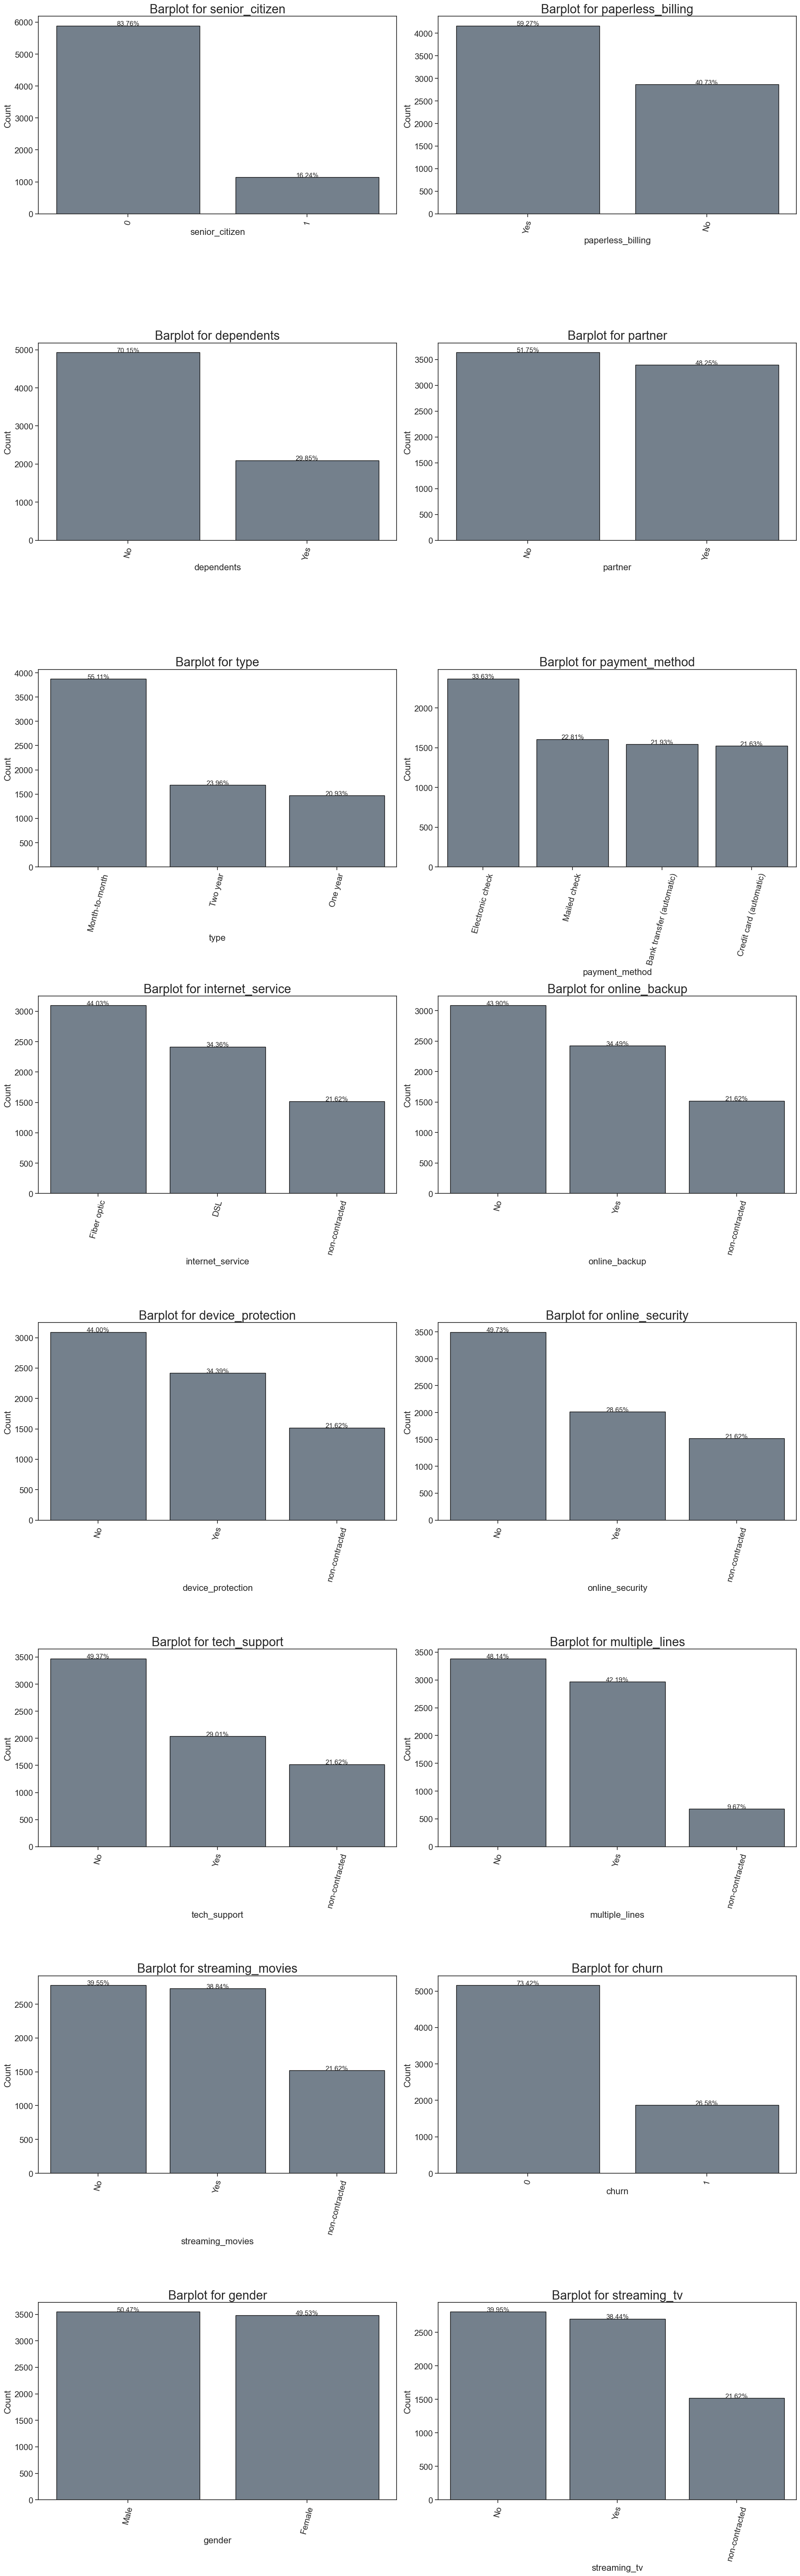

In [32]:
# Establecer el estilo de seaborn
sns.set(style="ticks")

# Determinar el número de filas necesarias para nuestros subgráficos
num_vars = len(categorical_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

# Crear los subgráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows*8))

# Aplanar el arreglo de ejes para que podamos iterar sobre él fácilmente
axes = axes.flatten()

# Iterar por cada columna
for i, column in enumerate(categorical_columns):
    total = len(df[column])  # Total number of data points for each column
    column_order = df[column].value_counts().nlargest(15).index
    ax = sns.countplot(x=column, data=df, order=column_order, ax=axes[i], color="slategray", edgecolor='black')

    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}'.format((height / total) * 100) + '%',  # Calculate and format percentage
                ha="center",
                fontsize=12)

    axes[i].set_title(f'Barplot for {column}', fontsize=22)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].tick_params(axis='x', rotation=75, labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

En el caso de las columnas categóricas, podemos concluir lo siguiente:

- **churn**: el 26.54% de clientes han dado de baja el servico frente a los 74.46% que siguen siendo clientes.

- **type**: el tipo de plan más popular es "month-to-month" (+50%), "two-year" (24.07%) y "one-year" (20.91%) siguen respectivamente con poca diferencia entre ellos.

- **payment_method**: La opción más popular de medio de pago es cheque eléctrónico (33.58%), lo demás medios de pago presentan una concentración similar de clientes (20% aproximadamente) donde la tarjeta de crédito es el medio de pago menos usado (21.61%).

- **paperless_billing**: la mayoría de contratos son de cargos sin uso de papel (59.22%).

- **gender**: la distribución entre clientes hombres y muejeres es casi igual, los hombres son ligeremente superior en cantidad.

- **dependents**: la mayoría de los clientes no tienen dependendientes (70.04%).

- **partner**: la distribución entre cliente con parejas (48.30%) y sin parajes es muy similar (51.70%), los que no tienen parejas son de mayor cantidad.

- **senior_citizen**: la gran parte de los clientes no son seniors (83.79%), es decir personas de la tercera edad (16.21%).

- **multiple_lines**: la mayoría de clientes que tiene el servicio de telefonía fija no son de múltiples líneas (48.13%) comparado con lo que si (42.18%).

- **streaming_tv**: la cantida de personas que adquiere y no adquiere el servicio de streming es muy similar, 38.44% vs 39.90%.

- **online_backup**: la mayoría de clientes no contratan el servicio de soporte online (43.84%) frente a lo que si (34.49%).

- **tech_support**: al igual que el soporte online, el soporte técnico tampoco es tan adquirido (49.31%), incluso es menos adquirido que el online.

- **internet_service**: la fibra óptica es el tipo de servicio de internte más contratado (43.96%), frente a los de DSL (34.37%).

- **device_protection**: este servicio tampoco es mu popular entre los clientes (43.94%).

- **online_security**: la mayoría de clinetes no contrata el servicio de seguridad online (49.67%).

- **streaming_movies**: la proporción entre los que no contratn y contratan el servidcio de streming de películas es casi igual (39.54% vs 21.67%).


Por último, veremos la relación que presentan las variables a través de un scatterplot y una matriz de correlación.

c:\Users\rfajardo\Desktop\GitHub\final_project\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


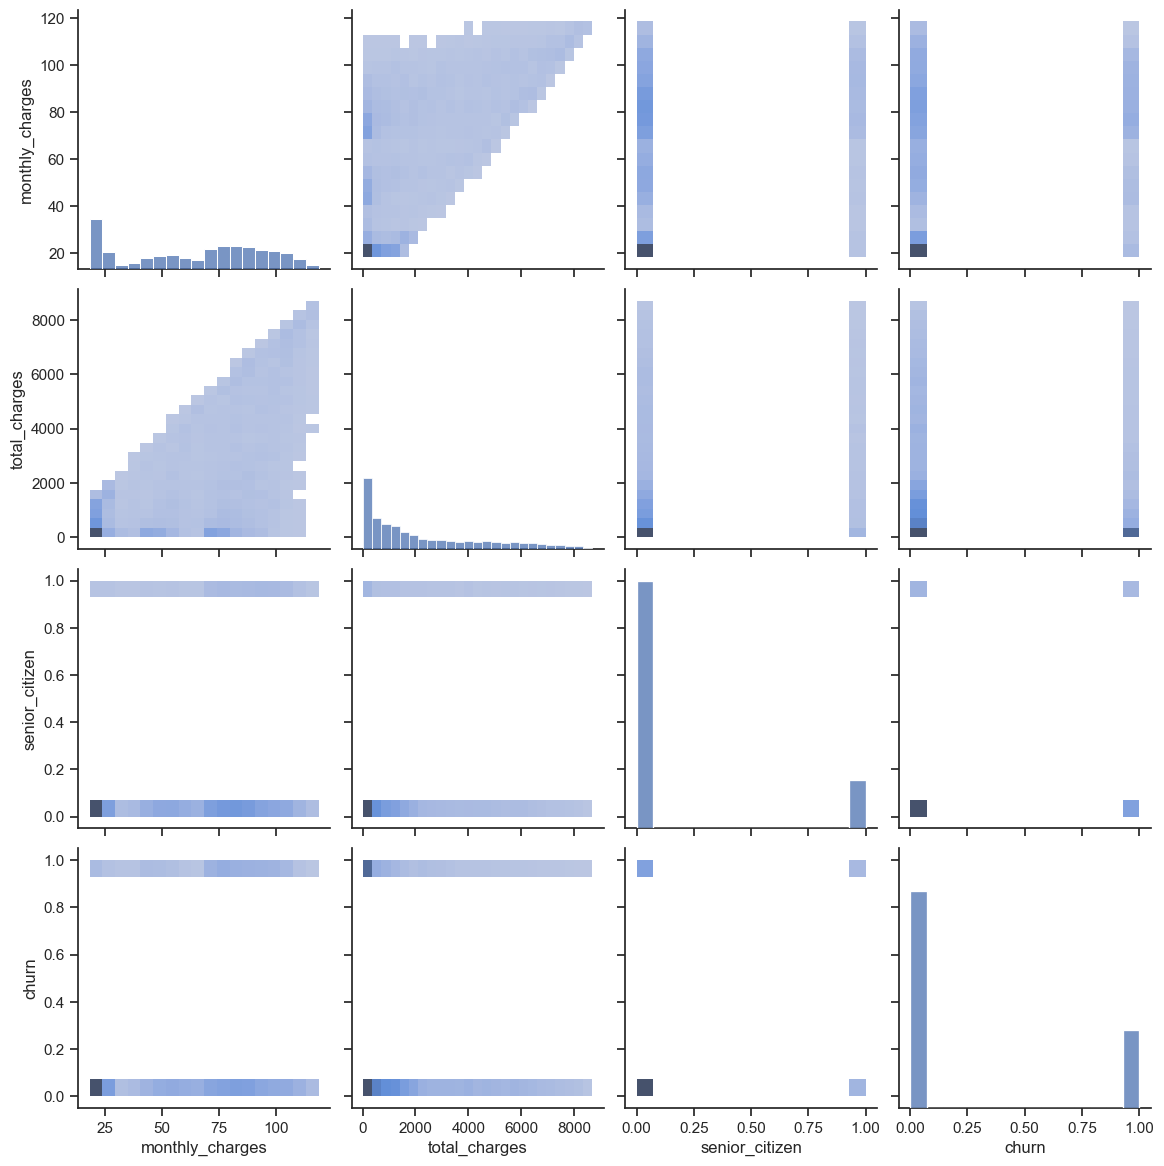

In [33]:
# Graficar gráfico de pares
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

c:\Users\rfajardo\Desktop\GitHub\final_project\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


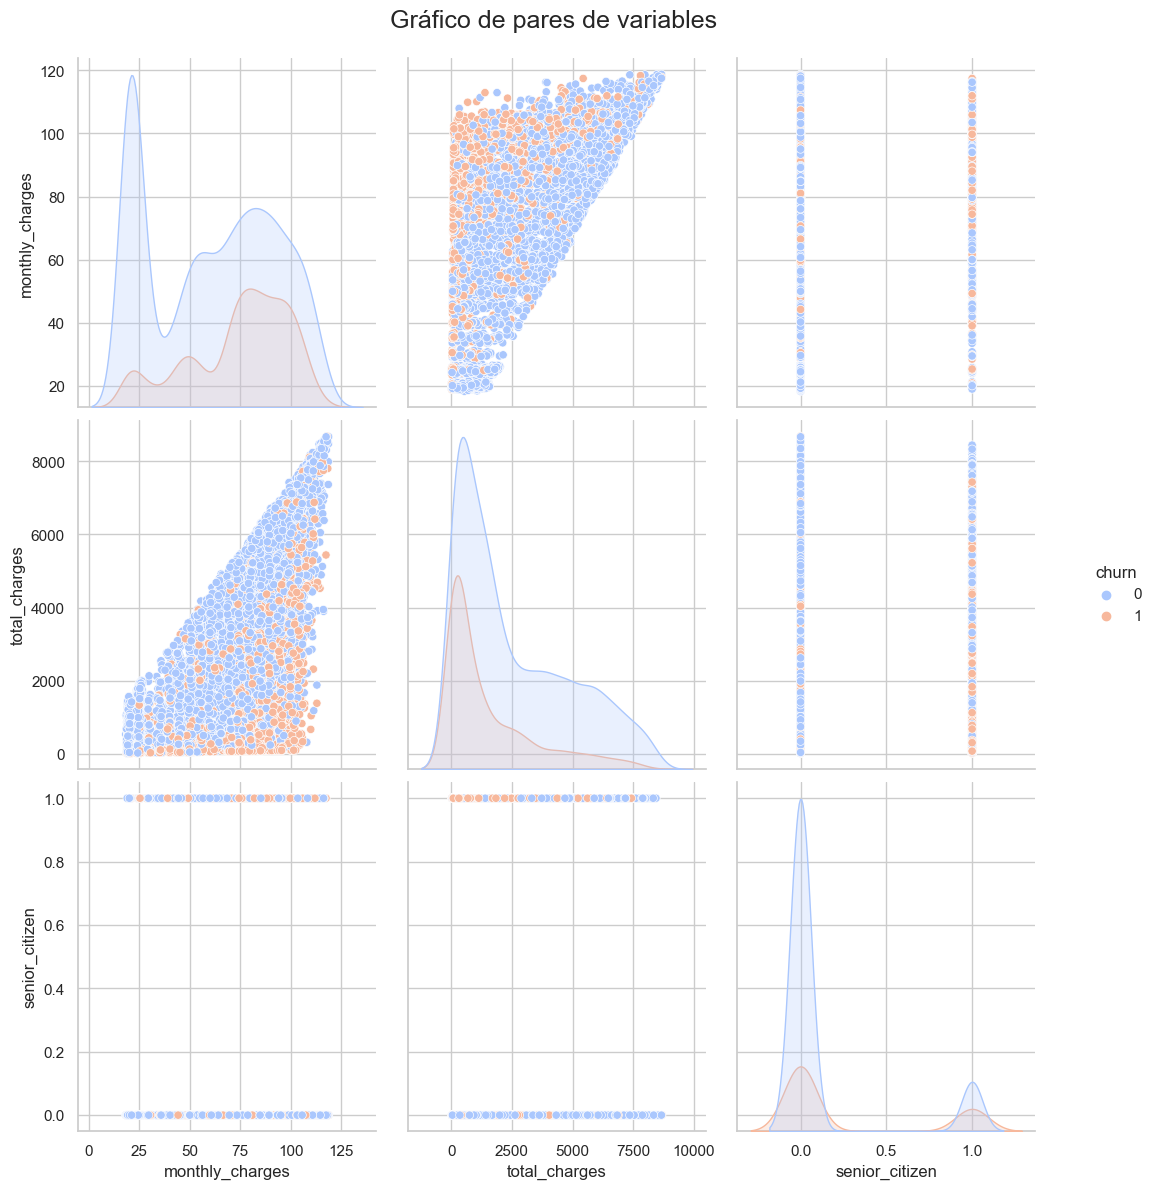

In [34]:
# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de pares
g = sns.pairplot(df, kind='scatter', diag_kind='kde',
                 hue='churn', # Cambia 'alguna_columna_categorica' por una columna categórica real de tu df si la tienes
                 palette='coolwarm')

# Establecer el tamaño del gráfico
g.fig.set_size_inches(12, 12)

# Agregar un título general
g.fig.suptitle('Gráfico de pares de variables', y=1.02, fontsize=18)

# Mejorar las etiquetas de los ejes (si lo deseas)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# Mostrar el gráfico
plt.show()

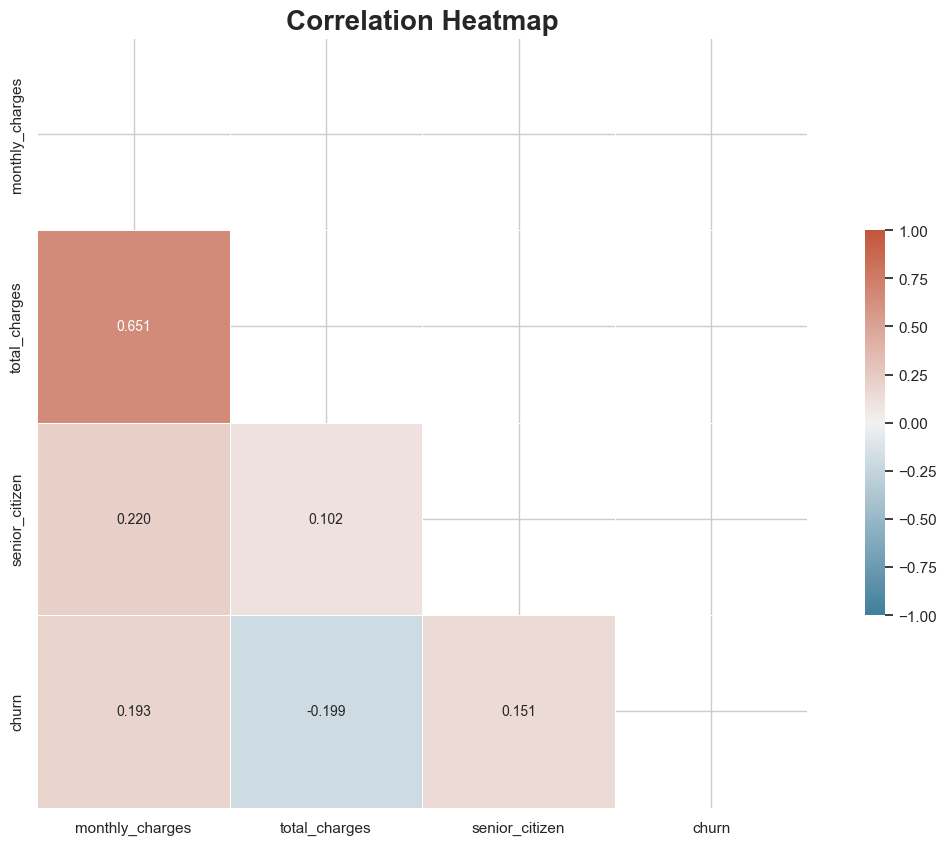

In [35]:
# Calcular la matriz de correlación
corr = df[['monthly_charges', 'total_charges', 'senior_citizen', 'churn']].corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(15, 10))

# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".3f", annot_kws={'size': 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Añadir un título al mapa de calor
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')

# Mostrar el mapa de calor
plt.show()

Tras analizar nuestra matriz de correlación y nuestro gráfico de pare, podemos extraer las siguientes conclusiones:

- Existe una fuerte correlación entre la carga mensual y la carga total. Esto era esperado: a mayor carga mensual, se acumula una mayor carga total.
- Se identifica una correlación positiva moderada entre la carga mensual y los clientes de edad avanzada, lo que sugiere que los clientes seniors tienden a tener cargos mensuales más elevados en el servicio.
- Se muestra una correlación positiva leve entre los contratos con cargos mensuales y la tasa de cancelación del servicio. En otras palabras, los clientes que tienen contratos con cargos mensuales son ligeramente más propensos a cancelar el servicio.
- Existe una correlación negativa leve entre la carga total y la tasa de cancelación del servicio (churn). Esto indica que los clientes con una carga total más alta son menos propensos a cancelar el servicio.
- Finalmente, hay una correlación positiva entre la tasa de cancelación del servicio y los clientes seniors, lo que sugiere que los clientes de edad avanzada son más propensos a abandonar el servicio.

## Preparación de datos

Previo a crear nuestros modelos los prepararemos relizando tanto la codificación de datos como la estandarización y separación en conjunto de entrenamiento y test. Asimismo, agregaremos un nueva variable que tome en cuenta la cantida de tiempo activo de un contrato en días. Para los contrats que no tienen fecha de fin, utilizaremos la última fecha registrada en 'end_date' (2020-01-01).

In [ ]:
# Verificar última fecha en 'end_date'
df['end_date'].value_counts()

In [36]:
# Crear una nueva columna con la diferencia en días
today = pd.Timestamp(datetime.now().date())  # Usamos la fecha actual como referencia

fixed_date = pd.Timestamp('2020-01-01')

df['day_difference'] = df['end_date'].apply(lambda x: pd.to_datetime(x) if x != 'No' else fixed_date) - df['begin_date']

# Convertir la diferencia en días a un número entero
df['day_difference'] = df['day_difference'].dt.days

C:\Users\rfajardo\AppData\Local\Temp\ipykernel_44428\4103246430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_difference'] = df['end_date'].apply(lambda x: pd.to_datetime(x) if x != 'No' else fixed_date) - df['begin_date']
C:\Users\rfajardo\AppData\Local\Temp\ipykernel_44428\4103246430.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_difference'] = df['day_difference'].dt.days


In [37]:
# Crear dataset final
df_final = df.drop(['customer_id', 'begin_date', 'end_date'], axis=1)

In [38]:
# Comprobar nueva variable
df_final.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn,day_difference
0,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,0,0
1,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,0,1005
2,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,0,1340
4,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,1,61


In [39]:
# Verificar info de dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7032 non-null   object 
 1   paperless_billing  7032 non-null   object 
 2   payment_method     7032 non-null   object 
 3   monthly_charges    7032 non-null   float64
 4   total_charges      7032 non-null   float64
 5   multiple_lines     7032 non-null   object 
 6   internet_service   7032 non-null   object 
 7   online_security    7032 non-null   object 
 8   online_backup      7032 non-null   object 
 9   device_protection  7032 non-null   object 
 10  tech_support       7032 non-null   object 
 11  streaming_tv       7032 non-null   object 
 12  streaming_movies   7032 non-null   object 
 13  gender             7032 non-null   object 
 14  senior_citizen     7032 non-null   int64  
 15  partner            7032 non-null   object 
 16  dependents         7032 non-n

### Codificación de datos, escalado de datos y split de dataset


Realizamos la codificación y el escalado debido a que algunos modelos que se creran requieren de este proceso para quer puedan funcionar correctamente. En el caso de los modelos relacionados a árboles, es mejor codificar nuestros datos categóricos a ordinales y para otros como el modelo XBoost es mejor codificar las variables categóricas usand OHE. También hay modelos que usaremos en los cuales no es necesario codificar los datos previamente (CatBoost, LighGBM).

#### Codificación One-Hot (OHE)

In [40]:
# Establecer columnas numéricas y categóricas
numeric_columns = ['monthly_charges' ,'total_charges', 'senior_citizen', 'day_difference']
categorical_columns = list(set(df_final.columns) - set(numeric_columns) - set(['churn']))

In [41]:
# Codificar las características categóricas
df_ohe = pd.get_dummies(df_final, drop_first=True)

#Escalar los datos numéricos
scaler = StandardScaler()
scaler.fit(df_ohe[numeric_columns])
df_ohe[numeric_columns] = scaler.transform(df_ohe[numeric_columns])
df_ohe.head()

,monthly_charges,total_charges,senior_citizen,churn,day_difference,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_non-contracted,tech_support_Yes,tech_support_non-contracted,streaming_tv_Yes,streaming_tv_non-contracted,streaming_movies_Yes,streaming_movies_non-contracted,gender_Male,partner_Yes,dependents_Yes
0,-1.161694,-0.994194,-0.440327,0,-1.299615,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,-0.260878,-0.173740,-0.440327,0,0.054182,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.363923,-0.959649,-0.440327,1,-1.217445,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.747850,-0.195248,-0.440327,0,0.505447,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.196178,-0.940457,-0.440327,1,-1.217445,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# Determinar features y target del modelo
features_ohe = df_ohe.drop('churn', axis=1)
target_ohe = df_ohe['churn']

# Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(
    features_ohe, 
    target_ohe,
    test_size=0.25,
    random_state=12345
)

# Comprobar división
print(f'Tamaño del conjunto de entrenamiento OHE: {features_train_ohe.shape}, {target_train_ohe.shape}')
print(f'Tamaño del conjunto de prueba OHE: {features_test_ohe.shape}, {target_test_ohe.shape}')

Tamaño del conjunto de entrenamiento OHE: (5274, 29), (5274,)
Tamaño del conjunto de prueba OHE: (1758, 29), (1758,)


#### Codificación de etiquetas

In [43]:
# Crear un copia de nuestro datset final
df_ordinal = df_final.copy().reset_index(drop=True)

# Codificar las características categóricas
encoder = OrdinalEncoder()
encoder.fit(df_ordinal[categorical_columns])
df_ordinal[categorical_columns] = pd.DataFrame(encoder.transform(df_ordinal[categorical_columns]), columns=categorical_columns)
df_ordinal.head()

#Escalar los datos numéricos
scaler = StandardScaler()
scaler.fit(df_ordinal[numeric_columns])
df_ordinal[numeric_columns] = scaler.transform(df_ordinal[numeric_columns])
df_ordinal.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn,day_difference
0,0.0,1.0,2.0,-1.161694,-0.994194,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.440327,1.0,0.0,0,-1.299615
1,1.0,0.0,3.0,-0.260878,-0.173740,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.440327,0.0,0.0,0,0.054182
2,0.0,1.0,3.0,-0.363923,-0.959649,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.440327,0.0,0.0,1,-1.217445
3,1.0,0.0,0.0,-0.747850,-0.195248,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.440327,0.0,0.0,0,0.505447
4,0.0,1.0,2.0,0.196178,-0.940457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440327,0.0,0.0,1,-1.217445


In [44]:
# Determinar features y target del modelo
features_ordinal = df_ordinal.drop('churn', axis=1)
target_ordinal = df_ordinal['churn']

# Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train_ordinal, features_test_ordinal, target_train_ordinal, target_test_ordinal = train_test_split(
    features_ordinal, 
    target_ordinal,
    test_size=0.25,
    random_state=12345
)

# Comprobar división
print(f'Tamaño del conjunto de entrenamiento ordinal: {features_train_ordinal.shape}, {target_train_ordinal.shape}')
print(f'Tamaño del conjunto de prueba ordinal: {features_test_ordinal.shape}, {target_test_ordinal.shape}')

Tamaño del conjunto de entrenamiento ordinal: (5274, 18), (5274,)
Tamaño del conjunto de prueba ordinal: (1758, 18), (1758,)


## Análisis de equilibrio de clases

Ahora que tenemos nuestra data preparada analizaremos el equilibrio de clases, es decir la proporción de los valores de nuestro target 'churn'. Los desiquilibrios de calse pueden afectar el rendimiento de nuestro modelos y podrían causar obtener resultados no deseados. Previo a hacer el análisis, hagamos una prueba de consistencia que servirá como punto de partida para los demás modelos, es decir que será como nuestro modelo de mínimo resultado que nuestros demás modelos deberían superar.

**Prueba de consistencia**

Para la prueba de consistencia utilizaremos un modelo de árbol de decisión.

In [45]:
# Desarrollar modelo de árbol de decisiones
dt_model = DecisionTreeClassifier(random_state=12345)
dt_model.fit(features_train_ordinal, target_train_ordinal)
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:, 1]

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)

print(auc_roc)

0.723047177107502


Ahora si veamos como se distribuye nuestro target.

**Distribución de target**

churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


<Axes: xlabel='churn'>

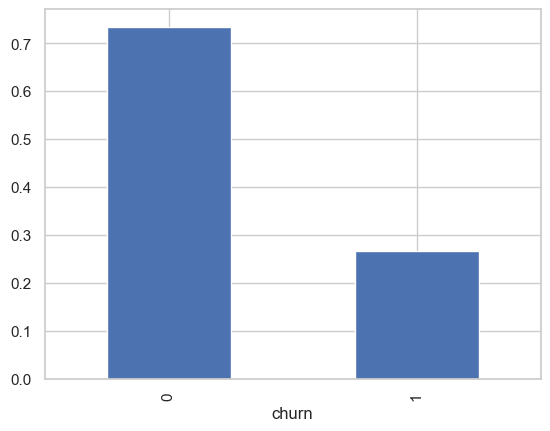

In [46]:
# Analizar distribución de clases
class_frequency = df_ordinal['churn'].value_counts(normalize=True)

print(class_frequency)
class_frequency.plot(kind='bar') 

Se puede observar que si existe un desequiibrio de clases, los resultados negativos (0) son de mayor proporción en nuestros datos, albergando alrededor del 70% de estos.

**Creación de modelo constante**

Nuestro mínmo AUC-ROC esperado de nuestro modelos debe superar 0.824, de otra manera debemos suponer que nuestro modelo no está funcionando correctamente. 

In [47]:
# Crear modelo constante y analizando su precisión en función al objetivo del modelo
target_pred_constant = pd.Series(0, index=target_ordinal.index)

print(accuracy_score(target_ordinal, target_pred_constant))

0.7342150170648464


### Conclusión

## Mejora de calidad del modelo

### Ajuste de peso de clase

In [48]:
# Relizar un ajuste de peso a nuestro modelo
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train_ordinal, target_train_ordinal)
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:, 1]

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc:.3f}')

AUC-ROC del modelo de Árbol de Decisión: 0.723


### Sobremuestreo

In [49]:
# Crear función para obtener sobremuestreo

def upsample(features, target, repeat):
    # Divir los datos en observaciones negativas y positivas
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Duplicar las observacipones positivas
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Barajar los datos
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [50]:
# Aplicar función para data con codificación de etiquetas
features_upsampled_ordinal, target_upsampled_ordinal = upsample(
    features_train_ordinal, target_train_ordinal, 3
)

In [51]:
# Comprobar sobremuestreo de datos objetivos
target_upsampled_ordinal.value_counts(normalize=True)

churn
1    0.521158
0    0.478842
Name: proportion, dtype: float64

In [52]:
# Aplicar función para data con codificación One-Hot
features_upsampled_ohe, target_upsampled_ohe = upsample(
    features_train_ohe, target_train_ohe, 3
)

In [53]:
# Comprobar sobremuestreo de datos objetivos
target_upsampled_ohe.value_counts(normalize=True)

churn
1    0.521158
0    0.478842
Name: proportion, dtype: float64

### Submuestreo

In [54]:
# Crear función para obtener submuestreo

def downsample(features, target, fraction):
    # Dividir los datos en observaciones negativas y positivas
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Descartar de manera aleatoria observacionesde clase '0' usando sample()
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    # Barajar los datos
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [55]:
# Aplicar función a data de con codificación de etiquetas: obtenemos solo 10% de las observaciones de clase '0'
features_downsampled_ordinal, target_downsampled_ordinal = downsample(
    features_train_ordinal, target_train_ordinal, 0.37
)

In [56]:
# Comprobar Submuestreo de datos objetivos
target_downsampled_ordinal.value_counts(normalize=True)

churn
0    0.504937
1    0.495063
Name: proportion, dtype: float64

In [57]:
# Aplicar función a data de con codificación One-Hot: obtenemos solo 10% de las observaciones de clase '0'
features_downsampled_ohe, target_downsampled_ohe = downsample(
    features_train_ohe, target_train_ohe, 0.37
)

In [58]:
# Comprobar Submuestreo de datos objetivos
target_downsampled_ohe.value_counts(normalize=True)

churn
0    0.504937
1    0.495063
Name: proportion, dtype: float64

## Creación de Modelos

Previo a la creación de modelos, estableceremos nuestro dataset final escogiendo solo las columnas que creamos necesarias para los mdodelos. Posteriormente, para cada modelo dividiremos nuestro dataset en un conjunto de entramiento y prueba seguinedo la proporción 75:25 respectivamente.

### Arbol de Decisión

**Ajuste de Hiperparámetros**

In [59]:
# Establecer los hiperparámetros de árbol de decisión
from sklearn.model_selection import GridSearchCV, StratifiedKFold
params_dt = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]
}


# Usar la función GridSearchCV y pasamos los hiperparámetros establecidos, la métrica y el valor para la validación cruzada
gridSearch_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=12345),
    param_grid=params_dt,
    scoring='roc_auc',
    cv=3
)

# Entrenar nuestro modelo para encontrar los mejores hiperparámetros
start = time.time()
gridSearch_dt.fit(features_train_ordinal, target_train_ordinal)
end = time.time()
print(f'Tiempo de ajuste de hiperparámetros de Árbol de Decisión: {end - start:.3f}s')

# Encontrar los mejores hiperparámetros
best_params = gridSearch_dt.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Tiempo de ajuste de hiperparámetros de Árbol de Decisión: 17.767s
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


**Ajuste de peso de clase**

In [60]:
# Entrenar el modelo de árbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345, class_weight='balanced')
dt_model.fit(features_train_ordinal, target_train_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Árbol de Decisión: 0.866
Tiempo de entrenamiento del modelo: 0.032s
Tiempo de prueba del modelo: 0.000s


**Sobremuestreo de clase**

In [61]:
# Entrenar el modelo de árbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345)
dt_model.fit(features_upsampled_ordinal, target_upsampled_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Árbol de Decisión: 0.869
Tiempo de entrenamiento del modelo: 0.032s
Tiempo de prueba del modelo: 0.000s


**Submuestreo de clase**

In [62]:
# Entrenar el modelo de árbol de decisión
start_train = time.time()
dt_model = DecisionTreeClassifier(**best_params, random_state=12345)
dt_model.fit(features_downsampled_ordinal, target_downsampled_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_dt = dt_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_dt)

print(f'AUC-ROC del modelo de Árbol de Decisión: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Árbol de Decisión: 0.850
Tiempo de entrenamiento del modelo: 0.008s
Tiempo de prueba del modelo: 0.008s


### Bosque Aleatorio

**Ajuste de Hiperparámetros**

In [63]:
params_rf = {
    'n_estimators': [10, 20, 40, 60, 80, 100],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Usar la función GridSearchCV y pasamos los hiperparámetros establecidos, la métrica y el valor para la validación cruzada
gridSearch_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=12345, class_weight='balanced'),
    param_grid=params_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Entrenar nuestro modelo para encontrar los mejores hiperparámetros
start = time.time()
gridSearch_rf.fit(features_train_ordinal, target_train_ordinal)
end = time.time()
print(f'Tiempo de ajuste de hiperparámetros de Bosque Aleatorio: {end - start:.3f}s')

# Encontrar los mejores hiperparámetros
best_params = gridSearch_rf.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Tiempo de ajuste de hiperparámetros de Bosque Aleatorio: 76.654s
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 80}


**Ajuste de peso de clase**

In [64]:
# Entrenar el modelo de bosque aleatorio
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345, class_weight='balanced')
rf_model.fit(features_train_ordinal, target_train_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_rf)

print(f'AUC-ROC del modelo de Bosque Aleatorio: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Bosque Aleatorio: 0.879
Tiempo de entrenamiento del modelo: 0.569s
Tiempo de prueba del modelo: 0.024s


**Sobremuestreo de clases**

In [67]:
# Entrenar el modelo de árbol de decisión
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345)
rf_model.fit(features_upsampled_ordinal, target_upsampled_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_rf)

print(f'AUC-ROC del modelo de Bosque Aleatorio: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Bosque Aleatorio: 0.880
Tiempo de entrenamiento del modelo: 0.767s
Tiempo de prueba del modelo: 0.016s


**Submuestreo de clases**

In [68]:
# Entrenar el modelo de árbol de decisión
start_train = time.time()
rf_model = RandomForestClassifier(**best_params, random_state=12345)
rf_model.fit(features_downsampled_ordinal, target_downsampled_ordinal)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_rf = rf_model.predict_proba(features_test_ordinal)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc = roc_auc_score(target_test_ordinal, target_prob_rf)

print(f'AUC-ROC del modelo de Bosque Aleatorio: {auc_roc:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Bosque Aleatorio: 0.873
Tiempo de entrenamiento del modelo: 0.374s
Tiempo de prueba del modelo: 0.023s


### CatBoost

CatBoost es un métodode potenciación de gradiente que no necesita de un preprocesamiento de catracterícticas categóricas, por lo que no es necesario utilizar OHE o codificación de etiquetas ya que el propio método asigna etiquetas. Es por ello que trabajaremos con nuestro dataset final `df_final`.

In [69]:
# Determinar features y target del modelo
features = df_final.drop('churn', axis=1)
target = df_final['churn']

# Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target,
    test_size=0.25,
    random_state=12345,
    stratify=target
)

# Comprobar división
print(f'Tamaño del conjunto de entrenamiento ordinal: {features_train.shape}, {target_train.shape}')
print(f'Tamaño del conjunto de prueba ordinal: {features_test.shape}, {target_test.shape}')

Tamaño del conjunto de entrenamiento ordinal: (5274, 18), (5274,)
Tamaño del conjunto de prueba ordinal: (1758, 18), (1758,)


**Ajuste de Hiperparámetros**

In [70]:
params_cb = {
    'iterations': [50, 100, 200],
    'depth': [4, 6, 10],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Llamar al estimador que utilizaremos, CatBoostRegressor y lo pasamos a GridSearchCv
catboost_est = CatBoostClassifier(cat_features=categorical_columns, verbose=False, loss_function='Logloss', class_weights=[1, 3])

# Usar la función GridSearchCV y pasamos los hiperparámetros establecidos, la métrica y el valor para la validación cruzada
gridSearch_cb = GridSearchCV(
    estimator=catboost_est,
    param_grid=params_cb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Entrenar nuestro modelo para encontrar los mejores hiperparámetros
start = time.time()
gridSearch_cb.fit(features_train, target_train)
end = time.time()
print(f'Tiempo de ajuste de hiperparámetros de CatBoost: {end - start:.3f}s')

# Encontrar los mejores hiperparámetros
best_params = gridSearch_cb.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Tiempo de ajuste de hiperparámetros de CatBoost: 303.403s
Mejores hiperparámetros: {'depth': 4, 'iterations': 200, 'learning_rate': 0.2}


**Ajuste de peso de clases**

In [71]:
# Entrenar el modelo de CatBoost
catboost_model = CatBoostClassifier(
    iterations=best_params['iterations'], 
    cat_features=categorical_columns, 
    verbose=False, 
    loss_function='Logloss',
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    class_weights=[1, 3]
)

start_train = time.time()
catboost_model.fit(features_train, target_train, cat_features=categorical_columns, verbose=False)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_cast = catboost_model.predict_proba(features_test)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_cb = roc_auc_score(target_test, target_prob_cast)

print(f'AUC-ROC del modelo de CatBoost: {auc_roc_cb:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de CatBoost: 0.916
Tiempo de entrenamiento del modelo: 8.307s
Tiempo de prueba del modelo: 0.017s


**Sobremuestreo de clases**

In [72]:
# Realizar sobremuestreo
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 3)

# Comprobar Sobremuestreo de datos objetivos
target_train_upsampled.value_counts(normalize=True)

churn
1    0.520673
0    0.479327
Name: proportion, dtype: float64

In [73]:
# Entrenar el modelo de CatBoost
catboost_model = CatBoostClassifier(
    iterations=best_params['iterations'], 
    cat_features=categorical_columns, 
    verbose=False, 
    loss_function='Logloss',
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate']
)

start_train = time.time()
catboost_model.fit(features_train_upsampled, target_train_upsampled, cat_features=categorical_columns, verbose=False)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_cast = catboost_model.predict_proba(features_test)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_cb = roc_auc_score(target_test, target_prob_cast)

print(f'AUC-ROC del modelo de CatBoost: {auc_roc_cb:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de CatBoost: 0.914
Tiempo de entrenamiento del modelo: 8.908s
Tiempo de prueba del modelo: 0.016s


**Submuestreo de clases**

In [74]:
# Realizar sobremuestreo
features_train_downsample, target_train_downsample = downsample(features_train, target_train, 0.37)

# Comprobar Submuestreo de datos objetivos
target_train_downsample.value_counts(normalize=True)

churn
0    0.505467
1    0.494533
Name: proportion, dtype: float64

In [75]:
# Entrenar el modelo de CatBoost
catboost_model = CatBoostClassifier(
    iterations=best_params['iterations'], 
    cat_features=categorical_columns, 
    verbose=False, 
    loss_function='Logloss',
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate']
)

start_train = time.time()
catboost_model.fit(features_train_downsample, target_train_downsample, cat_features=categorical_columns, verbose=False)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_cast = catboost_model.predict_proba(features_test)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_cb = roc_auc_score(target_test, target_prob_cast)

print(f'AUC-ROC del modelo de CatBoost: {auc_roc_cb:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de CatBoost: 0.907
Tiempo de entrenamiento del modelo: 7.248s
Tiempo de prueba del modelo: 0.008s


**Método 'scale_pos_weight'**

In [76]:
# Ajuste automático de clases desbalanceadas
scale_pos_weight = len(target_train[target_train == 0]) / len(target_train[target_train == 1])

# Entrenar el modelo de CatBoost
catboost_model = CatBoostClassifier(
    iterations=100, 
    cat_features=categorical_columns, 
    verbose=False, 
    loss_function='Logloss',
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    scale_pos_weight=scale_pos_weight
)

start_train = time.time()
catboost_model.fit(features_train, target_train, cat_features=categorical_columns, verbose=False)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_cast = catboost_model.predict_proba(features_test)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_cb = roc_auc_score(target_test, target_prob_cast)

print(f'AUC-ROC del modelo de CatBoost: {auc_roc_cb:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de CatBoost: 0.895
Tiempo de entrenamiento del modelo: 3.139s
Tiempo de prueba del modelo: 0.016s


### LightGBM

In [77]:
# Crear un copia de nuestro datset final
df_gbm = df_final.copy().reset_index(drop=True)

# Transformar caraterísticas categóricas a tipo "category"

for feature in categorical_columns:
    df_gbm[feature] = df_gbm[feature].astype("category")
    
# Determinar features y target del modelo
features_gbm = df_gbm.drop('churn', axis=1)
target_gbm = df_gbm['churn']

# Dividir nuestro dataset en conjunto de entrenamiento y prueba 75:25
features_train_gbm, features_test_gbm, target_train_gbm, target_test_gbm = train_test_split(
    features_gbm, 
    target_gbm,
    test_size=0.25,
    random_state=12345
)

# Comprobar división
print(f'Tamaño del conjunto de entrenamiento: {features_train_gbm.shape}, {target_train_gbm.shape}')
print(f'Tamaño del conjunto de prueba: {features_test_gbm.shape}, {target_test_gbm.shape}')

Tamaño del conjunto de entrenamiento: (5274, 18), (5274,)
Tamaño del conjunto de prueba: (1758, 18), (1758,)


In [78]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#  Establecer los hiperparámetros que vamos a ajustar
params_lightgbm = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [10, 15, 20],
    'min_child_samples': [10, 20],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Llamar al estimador que utilizaremos
lightgbm_est = LGBMClassifier()

# Usar la función GridSearchCV y pasamos los hiperparámetros establecidos, la métrica y el valor para la validación cruzada
gridSearch_lightgbm = GridSearchCV(
    estimator=lightgbm_est,
    param_grid=params_lightgbm,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Entrenar nuestro modelo para encontrar los mejores hiperparámetros
start = time.time()
gridSearch_lightgbm.fit(features_train_gbm, target_train_gbm)
end = time.time()
print(f'Tiempo de ajuste de hiperparámetros de LightGBM: {end - start:.3f}s')

# Encontrar los mejores hiperparámetros
best_params = gridSearch_lightgbm.best_params_
print(f'Mejores hiperparámetros: {best_params}')

[LightGBM] [Info] Number of positive: 1404, number of negative: 3870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266212 -> initscore=-1.013929
[LightGBM] [Info] Start training from score -1.013929
Tiempo de ajuste de hiperparámetros de LightGBM: 289.061s
Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'min_child_samples': 10, 'n_estimators': 200, 'num_leaves': 15, 'subsample': 0.7}


**Ajuste de peso de clases**

In [79]:
# Entrenar el modelo de LightGBM
lightgbm_model = LGBMClassifier(
    **best_params,
    random_seed=12345,
    class_weight={0: 1, 1: 3}
)

start_train = time.time()
lightgbm_model.fit(features_train_gbm, target_train_gbm)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_gbm = lightgbm_model.predict_proba(features_test_gbm)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_gbm = roc_auc_score(target_test_gbm, target_prob_gbm)

print(f'AUC-ROC del modelo de LighGBM: {auc_roc_gbm:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

[LightGBM] [Info] Number of positive: 1404, number of negative: 3870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521158 -> initscore=0.084683
[LightGBM] [Info] Start training from score 0.084683
AUC-ROC del modelo de LighGBM: 0.919
Tiempo de entrenamiento del modelo: 0.372s
Tiempo de prueba del modelo: 0.024s


[LightGBM] [Info] Number of positive: 1404, number of negative: 3870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521158 -> initscore=0.084683
[LightGBM] [Info] Start training from score 0.084683


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

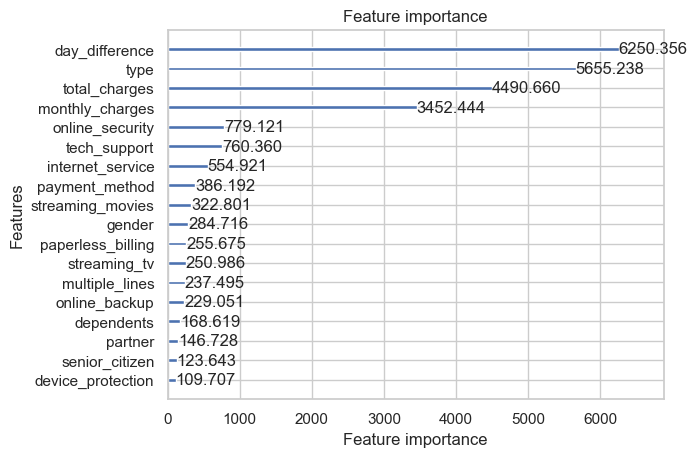

In [80]:
from lightgbm import plot_importance

# Entrenar el modelo
lightgbm_model.fit(features_train_gbm, target_train_gbm)

# Visualizar la importancia de las características
plot_importance(lightgbm_model, importance_type='gain')

**Sobremuestreo de clases**

In [81]:
# Realizar sobremuestreo
features_train_upsampled_gbm, target_train_upsampled_gbm = upsample(features_train_gbm, target_train_gbm, 3)

# Comprobar Sobremuestreo de datos objetivos
target_train_upsampled_gbm.value_counts(normalize=True)

churn
1    0.521158
0    0.478842
Name: proportion, dtype: float64

In [82]:
# Entrenar el modelo de LightGBM
lightgbm_model = LGBMClassifier(
    **best_params,
    random_seed=12345
)

start_train = time.time()
lightgbm_model.fit(features_train_upsampled_gbm, target_train_upsampled_gbm)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_gbm = lightgbm_model.predict_proba(features_test_gbm)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_gbm = roc_auc_score(target_test_gbm, target_prob_gbm)

print(f'AUC-ROC del modelo de LighGBM: {auc_roc_gbm:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

[LightGBM] [Info] Number of positive: 4212, number of negative: 3870
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 8082, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.521158 -> initscore=0.084683
[LightGBM] [Info] Start training from score 0.084683
AUC-ROC del modelo de LighGBM: 0.914
Tiempo de entrenamiento del modelo: 0.333s
Tiempo de prueba del modelo: 0.026s


**Submuestreo de clases**

In [83]:
# Realizar sobremuestreo
features_train_downsampled_gbm, target_train_downsampled_gbm = downsample(features_train_gbm, target_train_gbm, 0.37)

# Comprobar Sobremuestreo de datos objetivos
target_train_downsampled_gbm.value_counts(normalize=True)

churn
0    0.504937
1    0.495063
Name: proportion, dtype: float64

In [84]:
# Entrenar el modelo de LightGBM
lightgbm_model = LGBMClassifier(
    **best_params,
    random_seed=12345
)

start_train = time.time()
lightgbm_model.fit(features_train_downsampled_gbm, target_train_downsampled_gbm)
end_train= time.time()

# Realizamos predicciones
start_test = time.time()
target_prob_gbm = lightgbm_model.predict_proba(features_test_gbm)[:, 1]
end_test = time.time()

# Calcular AUC-ROC
auc_roc_gbm = roc_auc_score(target_test_gbm, target_prob_gbm)

print(f'AUC-ROC del modelo de LighGBM: {auc_roc_gbm:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

[LightGBM] [Info] Number of positive: 1404, number of negative: 1432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 2836, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495063 -> initscore=-0.019747
[LightGBM] [Info] Start training from score -0.019747
AUC-ROC del modelo de LighGBM: 0.897
Tiempo de entrenamiento del modelo: 0.275s
Tiempo de prueba del modelo: 0.025s


### XGBoost

In [85]:
# Llamar al estimador que utilizaremos
params_xboost = {
    'max_depth': [3, 4, 6],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1]
}

# Definir el estimador de XGBoost (xboost_est)
xboost_est = XGBClassifier(random_state=12345)

# Usar la función GridSearchCV y pasamos los hiperparámetros establecidos, la métrica y el valor para la validación cruzada
gridSearch_xboost = GridSearchCV(
    estimator=xboost_est,
    param_grid=params_xboost,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Entrenar nuestro modelo para encontrar los mejores hiperparámetros
start = time.time()
gridSearch_xboost.fit(features_train_ohe, target_train_ohe)
end = time.time()
print(f'Tiempo de ajuste de hiperparámetros de XGBoost: {end - start:.3f}s')

# Encontrar los mejores hiperparámetros
best_params = gridSearch_xboost.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Tiempo de ajuste de hiperparámetros de XGBoost: 7.575s
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}


In [86]:
# Entrenar el modelo de XGBoost
xboost_model = XGBClassifier(
    **best_params,
    random_state=12345
)

start_train = time.time()
xboost_model.fit(features_train_ohe, target_train_ohe)
end_train= time.time()

# Realizar predicciones
start_test = time.time()
target_pred_xboost = xboost_model.predict_proba(features_test_ohe)[:, 1]
end_test = time.time()

# Calcular precisión
accuracy_xboost= roc_auc_score(target_test_ohe, target_pred_xboost)

print(f'AUC-ROC del modelo de Xboost: {accuracy_xboost:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Xboost: 0.912
Tiempo de entrenamiento del modelo: 0.382s
Tiempo de prueba del modelo: 0.021s


**Sobremuestreo de clases**

In [87]:
# Entrenar el modelo de XGBoost
xboost_model = XGBClassifier(
    **best_params,
    random_state=12345
)

start_train = time.time()
xboost_model.fit(features_upsampled_ohe, target_upsampled_ohe)
end_train= time.time()

# Realizar predicciones
start_test = time.time()
target_pred_xboost = xboost_model.predict_proba(features_test_ohe)[:, 1]
end_test = time.time()

# Calcular precisión
accuracy_xboost= roc_auc_score(target_test_ohe, target_pred_xboost)

print(f'AUC-ROC del modelo de Xboost: {accuracy_xboost:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Xboost: 0.911
Tiempo de entrenamiento del modelo: 0.490s
Tiempo de prueba del modelo: 0.024s


**Submuestreo de clases**

In [88]:
# Entrenar el modelo de XGBoost
xboost_model = XGBClassifier(
    **best_params,
    random_state=12345
)

start_train = time.time()
xboost_model.fit(features_downsampled_ohe, target_downsampled_ohe)
end_train= time.time()

# Realizar predicciones
start_test = time.time()
target_pred_xboost = xboost_model.predict_proba(features_test_ohe)[:, 1]
end_test = time.time()

# Calcular precisión
accuracy_xboost= roc_auc_score(target_test_ohe, target_pred_xboost)

print(f'AUC-ROC del modelo de Xboost: {accuracy_xboost:.3f}')
print(f'Tiempo de entrenamiento del modelo: {end_train - start_train:.3f}s')
print(f'Tiempo de prueba del modelo: {end_test - start_test:.3f}s')

AUC-ROC del modelo de Xboost: 0.898
Tiempo de entrenamiento del modelo: 0.343s
Tiempo de prueba del modelo: 0.016s


## Preguntas

1. ¿A qué se refiere la columnas PaperlessBilling en el dataset contract? Algunos casos de mailcheck cuentan con valor "YES" y "NO". ¿Qué significan estos casos?, ¿Son errores?.
2. ¿Los contratos son por producto o servicio total?, algunos clientes tienen ambos productos, pero solo un contrato.
3. En el caso del producto de internet, esta se puede configurar a través de una línea telefónica. ¿Esta línea puede ser de otro proveedor?
4. ¿El tipo de configuración de internet tiene algún efecto en la calidad del mismo? Por ejemplo: fibra óptica.
5. Actualmente, utilizar un medio de pago físico (papel) puede generar un cobro adicional ¿Ocurre en este caso?
6. ¿Hay algún beneifico entre eligir un plan de largo plazo en vez de uno de corto plazo?

## Plan de trabajo

1. Incialización
Describiremos el proyecto, establceremos los objetivos del mismo y haremos un pequeño resumen del contenido de nuestros datasets.
2. Cargar de datos
3. Análisis exploratorio
Realizaremos un análisis de nuestra data, veremos tanto si nuestros datos cuantan con valores atípicos, ausentes, duplicados o algún otro problema que creamos que debamos investigar más a fondo.
4. Análisis de datos
Haremos un análisis profundo de nuestras variables donde veremos la distribución de las mismas, relación entre ellas y otros aspectos necesarios para determinar el comportamiento de las mismas y, con ello, ver si es necesario hacer una modificación en alguna de ellas más adelante.
5. Preparación de datos
Prepararemos nuestros datos según las conclusiones de nuestro análisis previo. El objetivo de esta etapa es obtener nuestro dataset listo para poder utilizarlo en nuestros modelos, esto incluye tratamiento de ausentes y valores atpipicos, creación de nuevas variables, modificación de tipos de datos, adición de nuevas variables, entre otros relacionados.
6. Creación y evaluación de modelos
Crearemos distintos modelos, identificaremos los mejores hiperparámetros para cada uno, los entrenaremos con nuestro dataset y los evaluaremos. Estableceremos los resultados e identificaremos el mejor modelo.
7. Conclusión
Finalmente, haremos un resumen de los pasos realizados en el proyecto, insghts importantes encontrados y la conclusión acerca de nuestros modelos.